# Logistic Regression

Logistic regression is a linear classifier ML model.

This time we will not predict a continious numerical value (like we did in 'Regression') but predict a 'category' or a 'class'. It can also be a binary variable: 0 or 1 (two categories). One example is tumor has two categories: benign or malignant.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

The dataset in this case is Social network ads. Let's imagine our favorite car company, and imagine you are a data scientist and your mission is to predict which of your previous customers will buy a brand new SUV just released by the car company? The general manager gave the dataset in which each row corresponds to different customers, features are 'age' and 'estimated salary' and the dependent variable is the 'Purchased' telling whether or not the customers have bought previously some older SUV of this car company; 0: did not buy earlier and 1: bought earlier.

The model will be trained on this dataset. We will predict whether a new customer will buy the new SUV: yes (1) or no (0). By this model the company will target the customers for whom the model predicted 1.

We have chosen here two features so that we can visualize in a 2D plot. In this plot, each dimension will be a feature.

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# The whole dataset dataframe

dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
dataset.isnull().sum()

# No missing values in the dataset.

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
# Matrix of features

X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [6]:
# Dependent variable vector

y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [9]:
print(y_train)

[0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0]


In [10]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [11]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

Note that we are doing the feature scaling **after splitting** into training and test sets in order to avoid information leackage from the test set, as we discuseed earlier.

Feature scaling is needed when there is explicit equation between y and X in a ML model, and the values of all the samples for different features are in different orders/ranges.

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [14]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

We see that after feature scaling, the values of all the observations for all the features falls in the same range [-3, 3] approximately.

Note that, since the logistic regression model will be trained on the training set which is feature scaled, the ***predict()*** method will also be apply to the feature scaled test set. The ***predict()*** method has to be applied on a set of features with the same scale as the one that was applied during the training.

## Training the Logistic Regression model on the Training set

In [15]:
from sklearn.linear_model import LogisticRegression   # Logistic regression is a linear classifier or linear model. We import the LogisticRegression class from the sklearn.linear_model module.
classifier = LogisticRegression(random_state = 0)   # Create an object of the LogisticRegression class. In this line, we build the logistic regression model. The model is not trained on the dataset in this line of code. Here we are taking the default parameters of the LogisticRegression class. In part-10 of this course we will learn how to choose the optimal values of the parameters to get the best version of the model. random_state is used to reproduce the result.
classifier.fit(X_train, y_train)   # In this line, we train the logistic regression model on the training set, using the fit() method.

# The most famous parameter is C = inverse of regulerization strength. Smaller is C, the stronger will be regulerization,
# and therefore more it will protect from overfitting. Here we just took the default value 1.

LogisticRegression(random_state=0)

## Predicting a new result

Note that, since the logistic regression model will be trained on the training set which is feature scaled, the ***predict()*** method will also be apply to the feature scaled test set. The ***predict()*** method has to be applied on a set of features with the same scale as the one that was applied during the training.

Remember that, any single observation (a single row) inside the ***predict()*** method has to be given in a double pair of swuare brackets as the ***predict()*** method expects a 2D array as its input.

In [16]:
# We first predict the purchased decision of a single observation: person of age = 30 and
# estimated salary = 87000 dollars (this is the first customer in the test set).

# There are 3 predict() methods: (i) predict() which predicts simply a category for a new observation,
# (ii) predict_log_proba which returns the log of probability of category = 1 (yes), (iii) predict_proba which
# directly returns probability of category = 1 (yes).

# We have to do two things: (i) give right format and (ii) transform (or standardize in this case)
# to scale in which the model was trained.

print(classifier.predict(sc.transform([[30, 87000]])))   # The predict() method is called from the 'classifier' object. As age = 30 and estimated salary = 87000 is in the original scale, and the logistic regression model is trained on the dataset with the scaled features, we transform (standardize in this case) the values of features for this new observation.

# We get 0 (No) for the given person, which matches with the true value i.e., the person of age = 30 and estimated salary = 87000
# dollars will not buy the new SUV which indeed match with the reality. Great!!

[0]


## Predicting the Test set results

Now we predict the purchased decision of all the customers in the test set using the trained model. We also display the predicted vector ($y_{pred}$) and true vector ($y_{test}$) for purchased decision, next to each other.

In [17]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis = 1))

# The first column is y_pred and second column is y_test (or y_true for the test set).
# We have lot of correct predictions with a few incorrect predictions also.

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

$\rm Accuracy = \frac{\rm Number~of~correct~predictions}{\rm Total~number~of~observations}$, for the test set.

The **Confusion matrix** will give us the number of correct prections, number of incorrect predictions for the two categories 0 and 1.

This is a $2\times 2$ matrix.

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score   # confusion_matrix and accuracy_score functions are imported from sklearn.metrics module.
cm = confusion_matrix(y_test, y_pred)   # confusion_matrix function takes y_true and y_pred as its input. Here we give y_true (y_test) and y_pred for the test set.
print('The confusion matrix is =\n', cm)

The confusion matrix is =
 [[65  3]
 [ 8 24]]


Each matrix element of the confusion matrix has meaning:

(i) We have 65 correct predictions for the category = 0 (i.e., No or customers did not buy the new SUV),

(ii) 24 correct predictions for the category = 1 (i.e., Yes or bought the SUV),

(iii) 8 incorrect predictions for the category = 0 (i.e., in reality they did not buy the SUV, but the LR model predicted they bought), and

(iv) 3 incorrect predictions for the category = 1 (i.e., in reality they bought the SUV, but the LR model predicted they did not buy).

In [19]:
print('The accuracy is =', accuracy_score(y_test, y_pred))

The accuracy is = 0.89


Accuracy is a right metric to evaluate the classification model. $\rm Accuracy~score = 0.89$ meaning we had 89% correct predictions in the test set. Also (65+24)/(65+24+8+3) = 0.89.

## Visualising the Training set results

Now we want to visualize how the logistic regression classifier was actually trained to classify our customers/observations into the two classes: 0 (did not buy SUV) and 1 (did buy SUV). We will do visualization for both the training and test sets.

We will also predict the regions: regions where prediction is 0 and regions where prediction is 1. We will see the classification curve (in this case a straght line in 2D since LR is a linear model) that separates these two regions. The classification curve is a straight line for linear model and some curved line for non-linear model.

So, we will visualize the **prediction curve** and **prediction regions** for each category using the logistic regression model. We will plot a 2D plot of which each axis is a feature. Each single point on this 2D plot is a single observation for a customer d(a row in the dataset).

Note that this visualization is not possible when there are many features.

In [20]:
# Some testing before final plot.

# First, we retransform the matrix of features for the training set into the original scale.

X_set, y_set = sc.inverse_transform(X_train), y_train

print(X_set)
print(y_set)

[[4.40e+01 3.90e+04]
 [3.20e+01 1.20e+05]
 [3.80e+01 5.00e+04]
 [3.20e+01 1.35e+05]
 [5.20e+01 2.10e+04]
 [5.30e+01 1.04e+05]
 [3.90e+01 4.20e+04]
 [3.80e+01 6.10e+04]
 [3.60e+01 5.00e+04]
 [3.60e+01 6.30e+04]
 [3.50e+01 2.50e+04]
 [3.50e+01 5.00e+04]
 [4.20e+01 7.30e+04]
 [4.70e+01 4.90e+04]
 [5.90e+01 2.90e+04]
 [4.90e+01 6.50e+04]
 [4.50e+01 1.31e+05]
 [3.10e+01 8.90e+04]
 [4.60e+01 8.20e+04]
 [4.70e+01 5.10e+04]
 [2.60e+01 1.50e+04]
 [6.00e+01 1.02e+05]
 [3.80e+01 1.12e+05]
 [4.00e+01 1.07e+05]
 [4.20e+01 5.30e+04]
 [3.50e+01 5.90e+04]
 [4.80e+01 4.10e+04]
 [4.80e+01 1.34e+05]
 [3.80e+01 1.13e+05]
 [2.90e+01 1.48e+05]
 [2.60e+01 1.50e+04]
 [6.00e+01 4.20e+04]
 [2.40e+01 1.90e+04]
 [4.20e+01 1.49e+05]
 [4.60e+01 9.60e+04]
 [2.80e+01 5.90e+04]
 [3.90e+01 9.60e+04]
 [2.80e+01 8.90e+04]
 [4.10e+01 7.20e+04]
 [4.50e+01 2.60e+04]
 [3.30e+01 6.90e+04]
 [2.00e+01 8.20e+04]
 [3.10e+01 7.40e+04]
 [4.20e+01 8.00e+04]
 [3.50e+01 7.20e+04]
 [3.30e+01 1.49e+05]
 [4.00e+01 7.10e+04]
 [5.10e+01 1.

In [21]:
# Create a mesh/grid points using numpy in 3D.

x = np.arange(0, 2, 1)
y = np.arange(0, 3, 1)
z = np.arange(0, 4, 1)

np.meshgrid(x, y, z)

[array([[[0, 0, 0, 0],
         [1, 1, 1, 1]],
 
        [[0, 0, 0, 0],
         [1, 1, 1, 1]],
 
        [[0, 0, 0, 0],
         [1, 1, 1, 1]]]),
 array([[[0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[1, 1, 1, 1],
         [1, 1, 1, 1]],
 
        [[2, 2, 2, 2],
         [2, 2, 2, 2]]]),
 array([[[0, 1, 2, 3],
         [0, 1, 2, 3]],
 
        [[0, 1, 2, 3],
         [0, 1, 2, 3]],
 
        [[0, 1, 2, 3],
         [0, 1, 2, 3]]])]

In [22]:
# Then, we create a very dense mesh/grid in the feature space using np.meshgrid() function. Each grid point
# creatres a pixel in the 2D plot. See that for generating the grid points we have used the np.arange()
# function, starting from less than the minimum value upto more than the maximum value with a step value
# for a feature. We have taken all the rows and different columns corresponds to different features by giving
# different column indices. Also notice that for age and estimated salary, the extension on both the sides are
# different (10 for age and 1000 for estimated salary) depending on the range of each feature.

print(np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25)))

# It returns a list of 2D arrays or matrices in which each 2D array or matrix has grid point
# coordiantes as matrix elements generated from each feature vector.

[array([[ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75],
       [ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75],
       [ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75],
       ...,
       [ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75],
       [ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75],
       [ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75]]), array([[ 14000.  ,  14000.  ,  14000.  , ...,  14000.  ,  14000.  ,
         14000.  ],
       [ 14000.25,  14000.25,  14000.25, ...,  14000.25,  14000.25,
         14000.25],
       [ 14000.5 ,  14000.5 ,  14000.5 , ...,  14000.5 ,  14000.5 ,
         14000.5 ],
       ...,
       [150999.25, 150999.25, 150999.25, ..., 150999.25, 150999.25,
        150999.25],
       [150999.5 , 150999.5 , 150999.5 , ..., 150999.5 , 150999.5 ,
        150999.5 ],
       [150999.75, 150999.75, 150999.75, ..., 150999.75, 150999.75,
        150999.75]])]


In [23]:
print(type(np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))))

<class 'list'>


In [24]:
# Here we decouple each element corresponding to each feature of the above list and assign to a dimension to be
# plotted below.

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

print(X1)
print(X2)

[[ 8.    8.25  8.5  ... 69.25 69.5  69.75]
 [ 8.    8.25  8.5  ... 69.25 69.5  69.75]
 [ 8.    8.25  8.5  ... 69.25 69.5  69.75]
 ...
 [ 8.    8.25  8.5  ... 69.25 69.5  69.75]
 [ 8.    8.25  8.5  ... 69.25 69.5  69.75]
 [ 8.    8.25  8.5  ... 69.25 69.5  69.75]]
[[ 14000.    14000.    14000.   ...  14000.    14000.    14000.  ]
 [ 14000.25  14000.25  14000.25 ...  14000.25  14000.25  14000.25]
 [ 14000.5   14000.5   14000.5  ...  14000.5   14000.5   14000.5 ]
 ...
 [150999.25 150999.25 150999.25 ... 150999.25 150999.25 150999.25]
 [150999.5  150999.5  150999.5  ... 150999.5  150999.5  150999.5 ]
 [150999.75 150999.75 150999.75 ... 150999.75 150999.75 150999.75]]


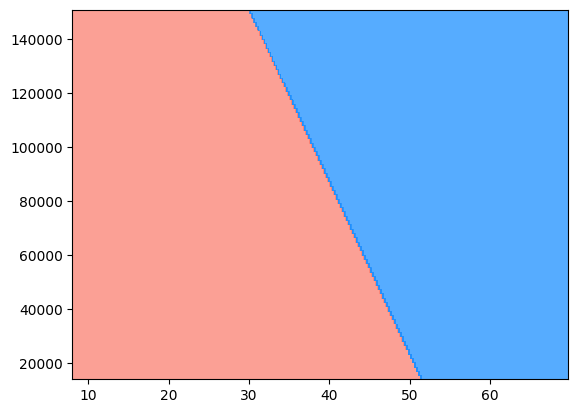

In [25]:
# Plot the prediction regions and prediction boundary or prediction curve. We have applied the predict() method
# to each of the grid points in the dense grid. The LR model takes a grid point (which is a single point
# in the feature space and hence a new observation to the model) and predict the category.

# So, all the grid points in the 'salmon' colored region are predicted as 0 by our traind LR model and all
# the grid points in the 'dodgerblue' colored region are predicted as 1 by our trained LR model. Since the grid
# points are highly dense, we see the regions as continious and not as discrete points.

from matplotlib.colors import ListedColormap

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(colors = ['salmon', 'dodgerblue']))


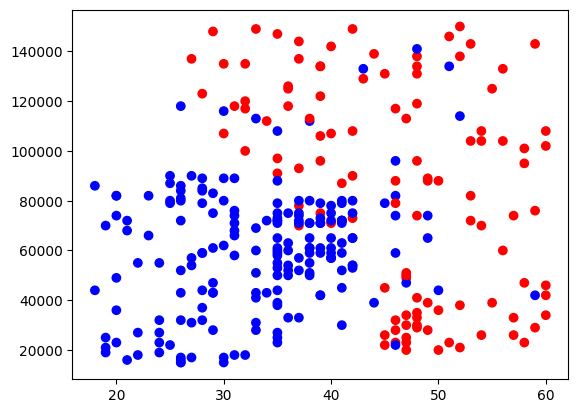

In [26]:
# Now do the scatter plot of true observation points in the feature space, with different colors for different
# category of dependent variable y. Here only two categories 0 and 1, so we have only two colors (Blue: 0 and
# Red: 1). Each point in the scatter plot is for a single customer.

# Using matplotlib:
# Ref.: https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels

colors = {0: 'Blue', 1: 'Red'}

plt.scatter(X_set[:, 0], X_set[:, 1],c = pd.Series(y_set).map(colors))
plt.show()


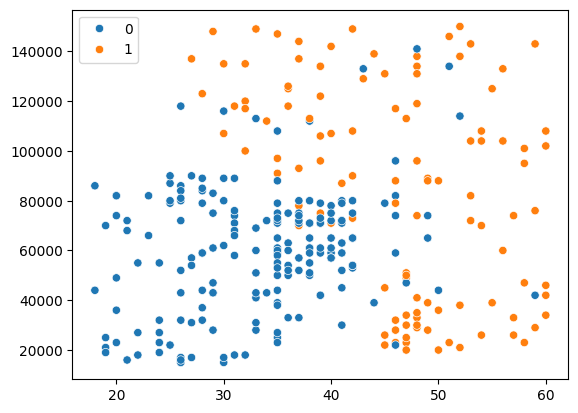

In [27]:
# Using seaborn:
# Ref.: https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels

import seaborn as sns

sns.scatterplot(x = X_set[:, 0], y = X_set[:, 1], hue = y_set);


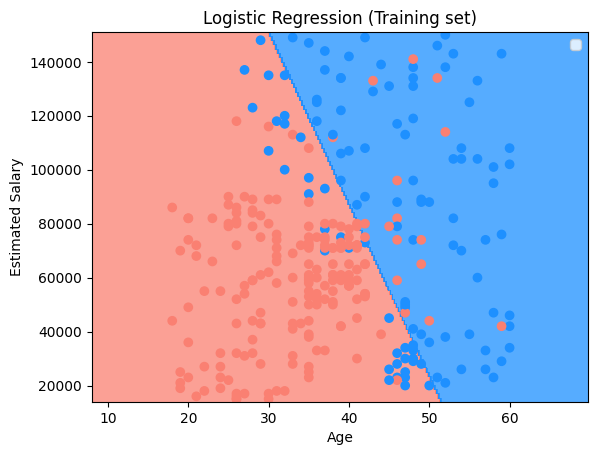

In [28]:
# Final plot

# Import the color map function.
from matplotlib.colors import ListedColormap

# To generate new array of values for each feature, we do feature scaling or standardization. X_set and y_set are
# in original scale.
X_set, y_set = sc.inverse_transform(X_train), y_train

# Create a very dense mesh/grid in the feature space using np.meshgrid() function. Note that X1, X2 are in
# original scale.
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))

# Plot the prediction regions and prediction boundary or prediction curve. Here we first do feature scaling
# or standardize and then apply the predict() method.
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(colors = ['salmon', 'dodgerblue']))

# Scatter plot of true observation points in the feature space, with different colors for different
# category of dependent variable y.
colors = {0: 'salmon', 1: 'dodgerblue'}
plt.scatter(X_set[:, 0], X_set[:, 1],c = pd.Series(y_set).map(colors))

# The following two lines of code was given by Udemy instructors. I have used the above two lines of code.
# for i, j in enumerate(np.unique(y_set)):
#    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)

# Set the x- and y-axes limit in the plot.
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Visualising the Test set results

In the above we have visualized for the training set and here we visualize the results for the test set. The test set is completely new to the model and thus new observations.

We have to understand the following things from the plot:

(i) All the scattered points are the real observations (each single point is for a single customer). The salmon points correspond to the category 0 (did not buy SUV) and the dodgerblue points correspond to the category 1 (bought SUV).

(ii) The colored regions are the prediction regions. The salmon colored region is where our trained LR model predicted category 0 and dodgerblue colored region is where our trained LR model predicted category 1.

(iii) The correct predictions are where the color of the observation points matches with the color of the prediction region or background. The incorrect predictions are where color of the observaion points is different from color of the prediction region or background.

(iv) The last thing is the prediction boundary. This is the boundary (straight line for a linear classifier and nonlinear curve for a non-linear classifier) that separates different categories/classes of the dependent variable y. Here the classifier separates two classes 0 and 1. The prediction curve or boundary is a straight line in 2D and a straight plane in 3D for logistic regression as the LR is a linear classifier.  

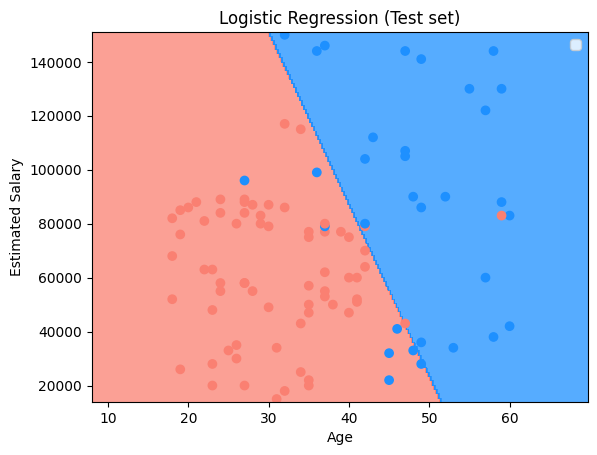

In [29]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colors = {0: 'salmon', 1: 'dodgerblue'}
plt.scatter(X_set[:, 0], X_set[:, 1],c = pd.Series(y_set).map(colors))

# for i, j in enumerate(np.unique(y_set)):
#    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


We notice that though there are some incorrect predictions both in training and test sets, most of the predictions are accurate. Great!! Logistic regression is very good classifier in this case.

But we can inprove the accuracy or reduce the number of incorrect predictions if we can have some non-linear classifiers which has lesser constraints than a linear classifier.